In [5]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [16]:
%matplotlib inline

In [19]:
shp_path = "../datasets/San_Telmo.shp"
sf = shp.Reader(shp_path)

In [20]:
sf

In [21]:
len(sf.shapes())

12193

In [22]:
sf.records()[1]

Record #1: [0.0, 0.0, '002-055-004']

In [26]:
sf.records()[1][2]

'002-055-004'

In [27]:
sf.records()[25]

Record #25: [0.0, 0.0, '002-046-021']

In [28]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


In [29]:
df = read_shapefile(sf)
df.shape

(12193, 4)

In [30]:
df.sample(5)

,ALTOS,ALTMETROS,SMP,coords
6037,1.0,0.0,004-021-024B,"[(108240.65300000086, 100838.06299999915), (10..."
9778,0.0,39.0,004-052-000,"[(108744.98560000211, 101298.1350999996), (108..."
9138,8.0,0.0,004-013-023,"[(108058.78399999999, 100555.94800000079), (10..."
9409,13.0,0.0,004-040-010,"[(108694.8880000012, 100865.03700000048), (108..."
5326,3.0,0.0,004-027-024B,"[(108400.26400000043, 100862.17300000135), (10..."


In [32]:
sf.shape()

In [36]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            #plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [37]:
plot_map

<function __main__.plot_map(sf, x_lim=None, y_lim=None, figsize=(11, 9))>

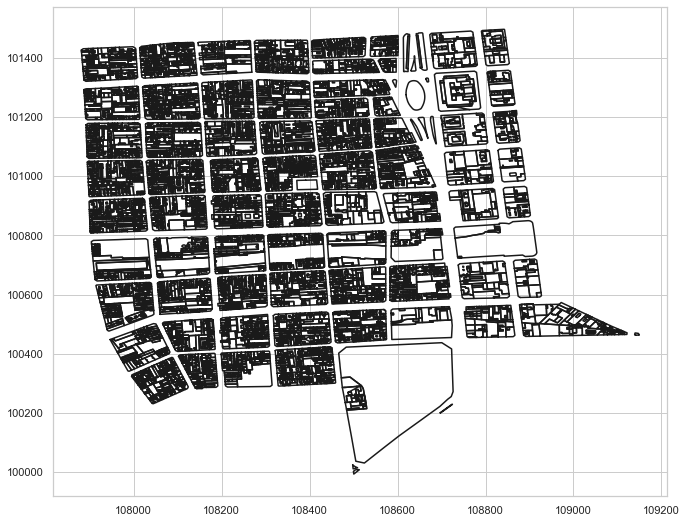

In [38]:
plot_map(sf)

In [42]:
y_lim = ( , ) # latitude 
x_lim = ( , ) # longitude
plot_map(sf, x_lim, y_lim)

SyntaxError: invalid syntax (<ipython-input-42-09dea75956ce>, line 1)